## EDA of Finance Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\kvjai\AppData\Local\Temp\ipykernel_22252\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel("personal finance data 2.xlsx")

df.head()

,Date / Time,Mode,Category,Sub category,Income/Expense,Debit/Credit
0,2021-01-01 21:45:00,CUB - online payment,Allowance,From dad,Income,8000.0
1,2021-01-01 21:46:00,CUB - online payment,Food,Snacks,Expense,85.0
2,2021-01-03 18:21:00,CUB - online payment,Other,From dad,Income,500.0
3,2021-01-03 18:22:00,CUB - online payment,Household,Stuffs,Expense,6667.0
4,2021-01-03 18:56:00,CUB - online payment,Transportation,Metro,Expense,30.0


In [7]:
df.shape

(225, 6)

In [11]:
 # Convert to datetime
df['Date / Time'] = pd.to_datetime(df['Date / Time'])

df = df.dropna()

<Axes: title={'center': 'Expenses by Category'}, xlabel='Category'>

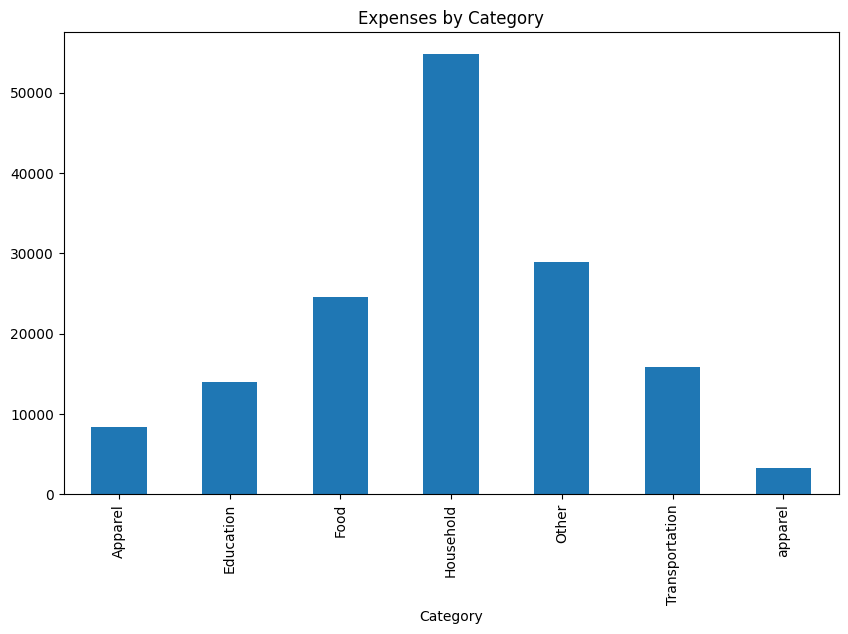

In [12]:
# data grouped by category and expenses are summed
expense_summary = df[df['Income/Expense'] == 'Expense'].groupby('Category')['Debit/Credit'].sum()

# bar chart
expense_summary.plot(kind='bar', figsize=(10, 6), title='Expenses by Category')

# Financial insights

In [ ]:
total_income = df[df['Income/Expense'] == 'Income']['Debit/Credit'].sum()

total_expenses = df[df['Income/Expense'] == 'Expense']['Debit/Credit'].sum()

savings = total_income - total_expenses

print(f"Total Income: {total_income}\nTotal Expenses: {total_expenses}\nSavings: {savings}")



Total Income: 698147.0
Total Expenses: 149853.28
Savings: 548293.72


<Axes: title={'center': 'Income vs Expenses'}, ylabel='Debit/Credit'>

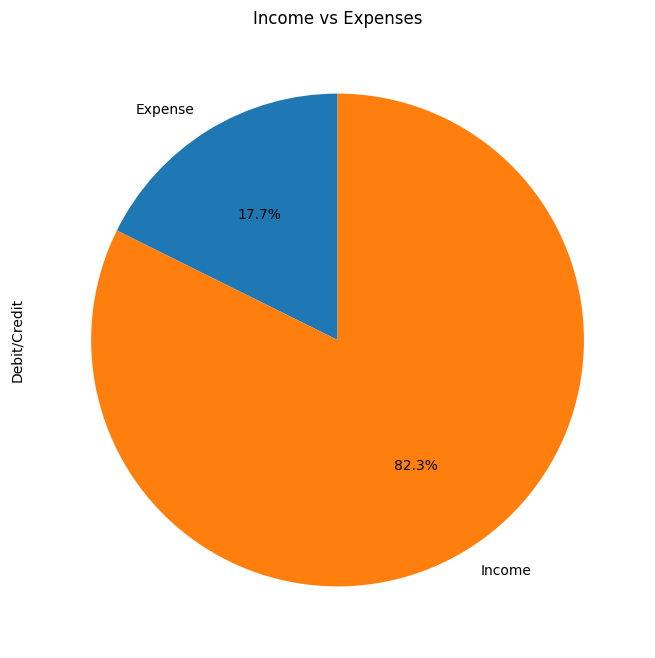

In [14]:
income_expense_summary = df.groupby('Income/Expense')['Debit/Credit'].sum()

income_expense_summary.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), title='Income vs Expenses')